<a href="https://colab.research.google.com/github/ViratK18/Data-Science-January/blob/Data-Science/Project_On_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/shivendutyagi/Datasets/main/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
for column in df.columns:
  print('Unique values in',column+':',
        df[column].unique())

Unique values in class: ['p' 'e']
Unique values in cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in cap-surface: ['s' 'y' 'f' 'g']
Unique values in cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in bruises: ['t' 'f']
Unique values in odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in gill-attachment: ['f' 'a']
Unique values in gill-spacing: ['c' 'w']
Unique values in gill-size: ['n' 'b']
Unique values in gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in stalk-shape: ['e' 't']
Unique values in stalk-root: ['e' 'c' 'b' 'r' '?']
Unique values in stalk-surface-above-ring: ['s' 'f' 'k' 'y']
Unique values in stalk-surface-below-ring: ['s' 'f' 'y' 'k']
Unique values in stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Unique values in veil-type: ['p']
Unique values in veil-color: ['w' 'n' 'o' 'y']
Unique values in ring-number: ['o' 't' 'n']

In [7]:
X=df.drop('class',axis=1)
y=df['class']

In [9]:
X_encoded=pd.get_dummies(X,drop_first=True)

In [10]:
X_encoded

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [11]:
y[y=='p']=1
y[y=='e']=0

y=y.astype('int')

In [12]:
X_encoded

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,test_size=0.34,random_state=42)

In [14]:
X_train

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7384,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
7364,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1791,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4231,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3783,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5390,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
860,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7603,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [15]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
dt=classifier.fit(X_train,y_train)

In [18]:
classifier.score(X_train,y_train)

1.0

In [19]:
classifier.score(X_test,y_test)

1.0

In [20]:
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

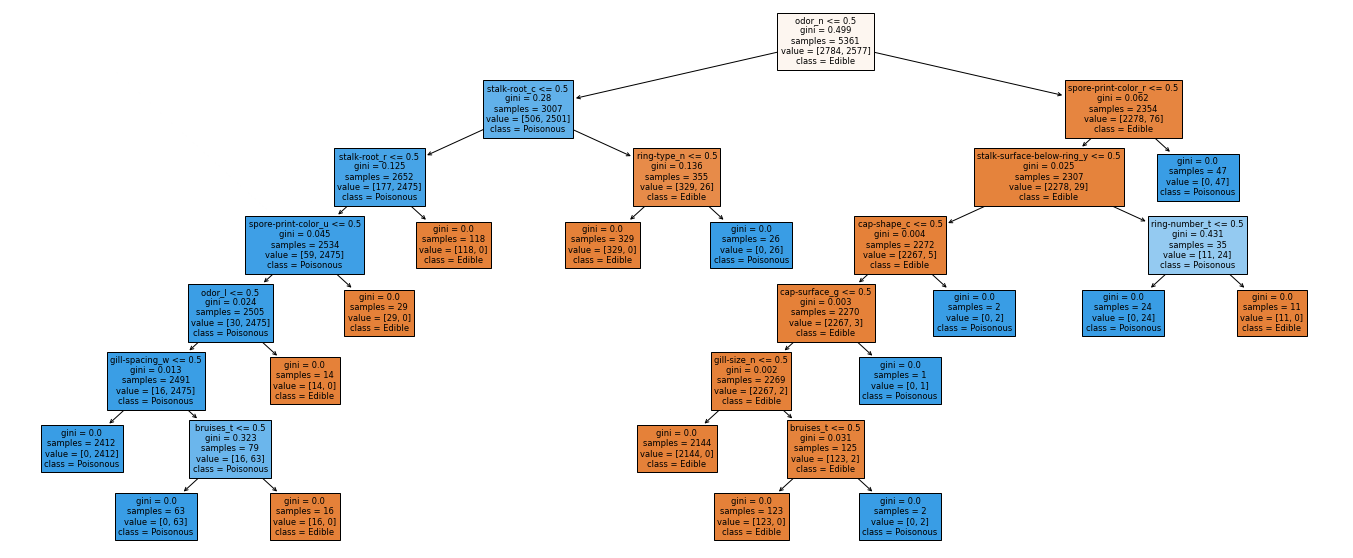

In [21]:
plt.figure(figsize=(24,10))
plot_tree(dt,filled=True,class_names=['Edible','Poisonous'],feature_names=X_encoded.columns);

In [22]:
score=cross_val_score(dt,X_train,y_train,cv=5)
for scores in score:
  print('Accuracy:',round(scores,4))

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 0.9981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


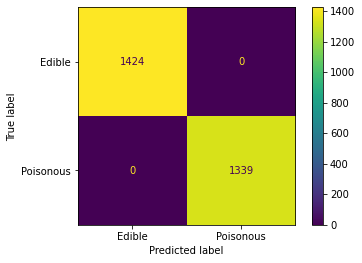

In [23]:
plot_confusion_matrix(dt,X_test,y_test,display_labels=['Edible','Poisonous'])